<center><h1>AirBnB Listing Analysis Using Exploratory Data Analysis</center>

## 
## Data Importing and Preprocessing

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
airbnb=pd.read_csv("Listings.csv",encoding='unicode_escape',low_memory=False)

In [4]:
df=airbnb.copy()

In [5]:
pd.set_option("display.max_columns",None)

In [6]:
df.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Buttes-Montmartre,NaN,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Elysee,NaN,Paris,48.88112,2.31712,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Vaugirard,NaN,Paris,48.84571,2.30584,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Passy,NaN,Paris,48.85500,2.26979,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [8]:
df.describe()

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2.797120e+05,2.797120e+05,150930.000000,166625.000000,279547.000000,279712.000000,279712.000000,279712.000000,250277.000000,279712.000000,279712.000000,2.797120e+05,188307.000000,187999.000000,188047.000000,187941.000000,188025.000000,187937.000000,187927.000000
mean,2.638196e+07,1.081658e+08,0.865939,0.827168,24.581612,18.761862,12.595075,3.288736,1.515509,608.792737,8.050967,2.755860e+04,93.405195,9.565476,9.312869,9.701534,9.698593,9.633994,9.335364
std,1.442576e+07,1.108570e+08,0.283744,0.289202,284.041143,32.560343,73.081309,2.133379,1.153080,3441.826611,31.518946,7.282875e+06,10.070437,0.990878,1.146072,0.867434,0.886884,0.833234,1.042625
min,2.577000e+03,1.822000e+03,0.000000,0.000000,0.000000,-34.264400,-99.339630,0.000000,1.000000,0.000000,1.000000,1.000000e+00,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.384462e+07,1.720656e+07,0.900000,0.780000,1.000000,-22.964390,-43.198040,2.000000,1.000000,75.000000,1.000000,4.500000e+01,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,2.767098e+07,5.826911e+07,1.000000,0.980000,1.000000,40.710785,2.382780,2.000000,1.000000,150.000000,2.000000,1.125000e+03,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,3.978485e+07,1.832853e+08,1.000000,1.000000,4.000000,41.908610,28.986730,4.000000,2.000000,474.000000,5.000000,1.125000e+03,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,4.834353e+07,3.901874e+08,1.000000,1.000000,7235.000000,48.904910,151.339810,16.000000,50.000000,625216.000000,9999.000000,2.147484e+09,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [9]:
df.duplicated().sum()

0

In [10]:
df.dtypes

listing_id                       int64
name                            object
host_id                          int64
host_since                      object
host_location                   object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost               object
host_total_listings_count      float64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
district                        object
city                            object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bedrooms                       float64
amenities                       object
price                            int64
minimum_nights                   int64
maximum_nights                   int64
review_scores_rating     

In [11]:
def info(data):
    print("data type",df[data].dtypes)
    print("null values",df[data].isnull().sum())

In [12]:
# remove unwanted columns
rem_col=["listing_id","name","host_id","host_location","neighbourhood","latitude","longitude","district"]
df.drop(rem_col,axis=1,inplace=True)

In [13]:
df.head(4)

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,2011-12-03,NaN,NaN,NaN,f,1.0,t,f,Paris,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,2013-11-29,NaN,NaN,NaN,f,1.0,t,t,Paris,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,2014-07-31,NaN,NaN,NaN,f,1.0,t,f,Paris,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,2013-12-17,NaN,NaN,NaN,f,1.0,t,t,Paris,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


##
## Data Exploring and cleaning

In [14]:
info("host_since")

data type object
null values 165


In [15]:
df["host_since"]=pd.to_datetime(df["host_since"])

<Axes: xlabel='host_since', ylabel='Density'>

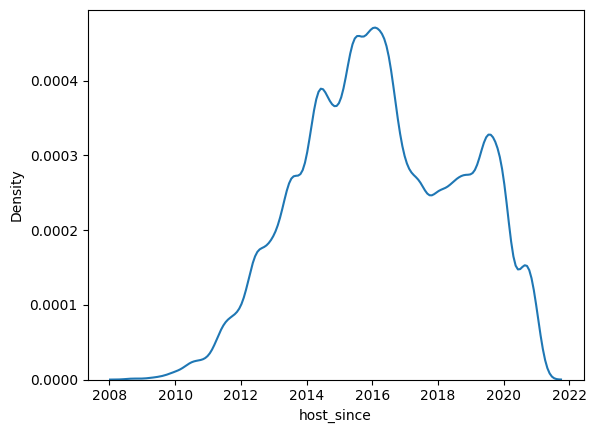

In [16]:
sns.kdeplot(df["host_since"])

In [17]:
df["host_since"]=df["host_since"].fillna(df["host_since"].mean())

In [18]:
info("host_since")

data type datetime64[ns]
null values 0


In [19]:
info("host_response_time")

data type object
null values 128782


In [20]:
df["host_response_time"].value_counts()

host_response_time
within an hour        83464
within a few hours    28891
within a day          23425
a few days or more    15150
Name: count, dtype: int64

In [21]:
df["host_response_time"]=df["host_response_time"].fillna(df["host_response_time"].mode()[0])

In [22]:
info("host_response_time")

data type object
null values 0


In [23]:
info("host_response_rate")

data type float64
null values 128782


<Axes: xlabel='host_response_rate', ylabel='Density'>

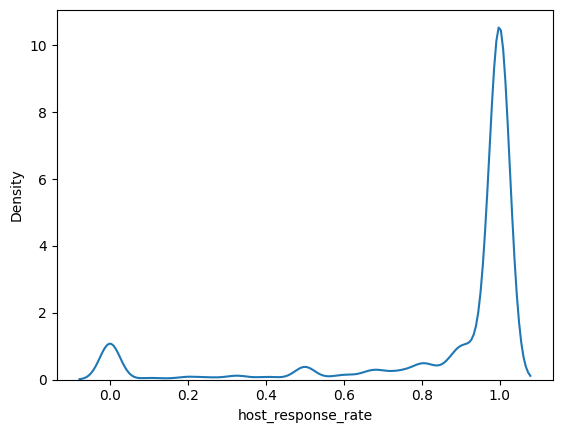

In [24]:
sns.kdeplot(df["host_response_rate"])

In [25]:
df["host_response_rate"]=df["host_response_rate"].fillna(df["host_response_rate"].median())

In [26]:
info("host_acceptance_rate")

data type float64
null values 113087


<Axes: xlabel='host_acceptance_rate', ylabel='Density'>

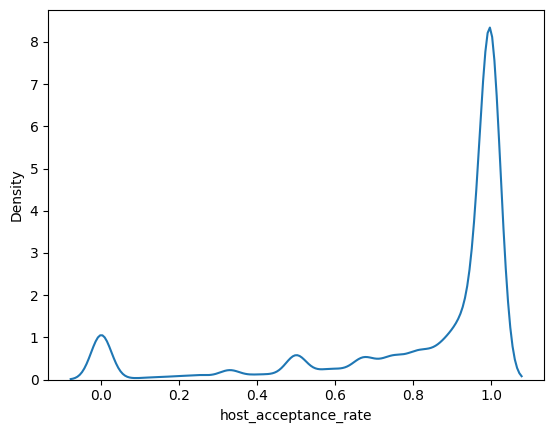

In [27]:
sns.kdeplot(df["host_acceptance_rate"])

In [28]:
df["host_acceptance_rate"]=df["host_acceptance_rate"].fillna(df["host_acceptance_rate"].median())

In [29]:
info("host_is_superhost")

data type object
null values 165


In [30]:
df["host_is_superhost"].value_counts()

host_is_superhost
f    229294
t     50253
Name: count, dtype: int64

In [31]:
df["host_is_superhost"]=df["host_is_superhost"].fillna(df["host_is_superhost"].mode()[0])

In [32]:
info("host_total_listings_count")

data type float64
null values 165


<Axes: xlabel='host_total_listings_count', ylabel='Density'>

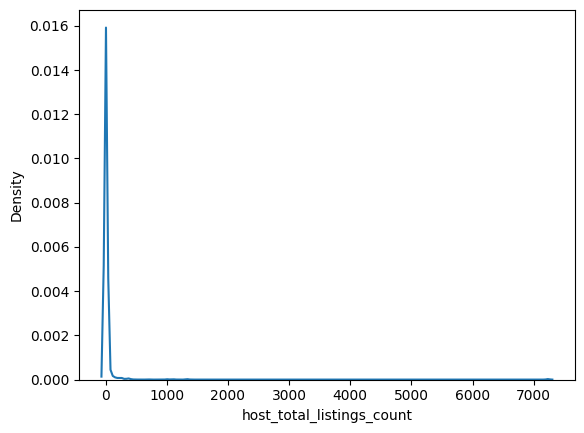

In [33]:
sns.kdeplot(df["host_total_listings_count"])

In [34]:
# count of number of hosts will never be 0. so its a wrong data
df["host_total_listings_count"].min()

0.0

In [35]:
df[(df["host_total_listings_count"]==0.0)].shape

(33265, 25)

In [36]:
df=df.drop(df[(df["host_total_listings_count"]==0.0)].index)

In [37]:
df.shape

(246447, 25)

In [38]:
df["host_total_listings_count"]=df["host_total_listings_count"].fillna(df["host_total_listings_count"].median())

In [39]:
df["host_total_listings_count"]=df["host_total_listings_count"].astype(int)

In [40]:
info("host_has_profile_pic")

data type object
null values 165


In [41]:
df["host_has_profile_pic"].value_counts()

host_has_profile_pic
t    245545
f       737
Name: count, dtype: int64

In [42]:
df["host_has_profile_pic"]=df["host_has_profile_pic"].fillna(df["host_has_profile_pic"].mode()[0])

In [43]:
info("host_identity_verified")

data type object
null values 165


In [44]:
df["host_identity_verified"].value_counts()

host_identity_verified
t    180419
f     65863
Name: count, dtype: int64

In [45]:
df["host_identity_verified"]=df["host_identity_verified"].fillna(df["host_identity_verified"].mode()[0])

In [46]:
df["accommodates"].min()

0

In [47]:
# hosts for 0 accommodates. its a faulty data
df[(df["accommodates"]==0)].shape

(14, 25)

In [48]:
df=df.drop(df[(df["accommodates"]==0)].index)

In [49]:
info("bedrooms")

data type float64
null values 25766


<Axes: xlabel='bedrooms'>

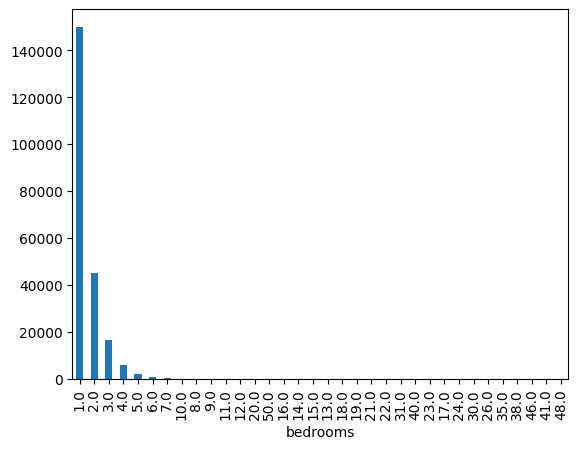

In [50]:
df["bedrooms"].value_counts().plot(kind="bar")

In [51]:
df["bedrooms"]=df["bedrooms"].fillna(df["bedrooms"].mode()[0])

In [52]:
df["bedrooms"]=df["bedrooms"].astype(int)

In [53]:
df['price'].min()

0

In [54]:
df[(df["price"]==0)].shape

(15, 25)

In [55]:
# remove the faulty data of hosts with 0 price
df=df.drop(df[(df["price"]==0)].index)

In [56]:
info("review_scores_rating")

data type float64
null values 75680


<Axes: xlabel='review_scores_rating', ylabel='Density'>

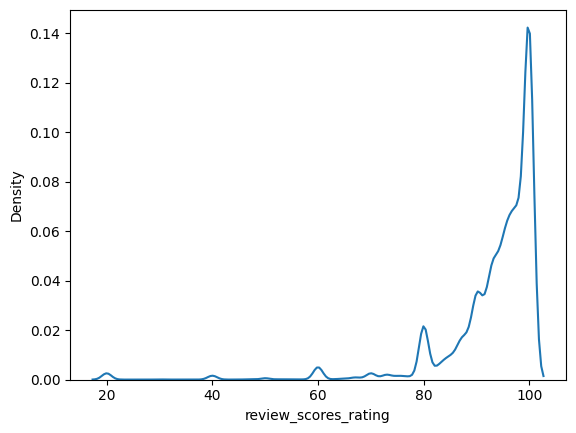

In [57]:
sns.kdeplot(df["review_scores_rating"])

In [58]:
df["review_scores_rating"]=df["review_scores_rating"].fillna(df["review_scores_rating"].median())

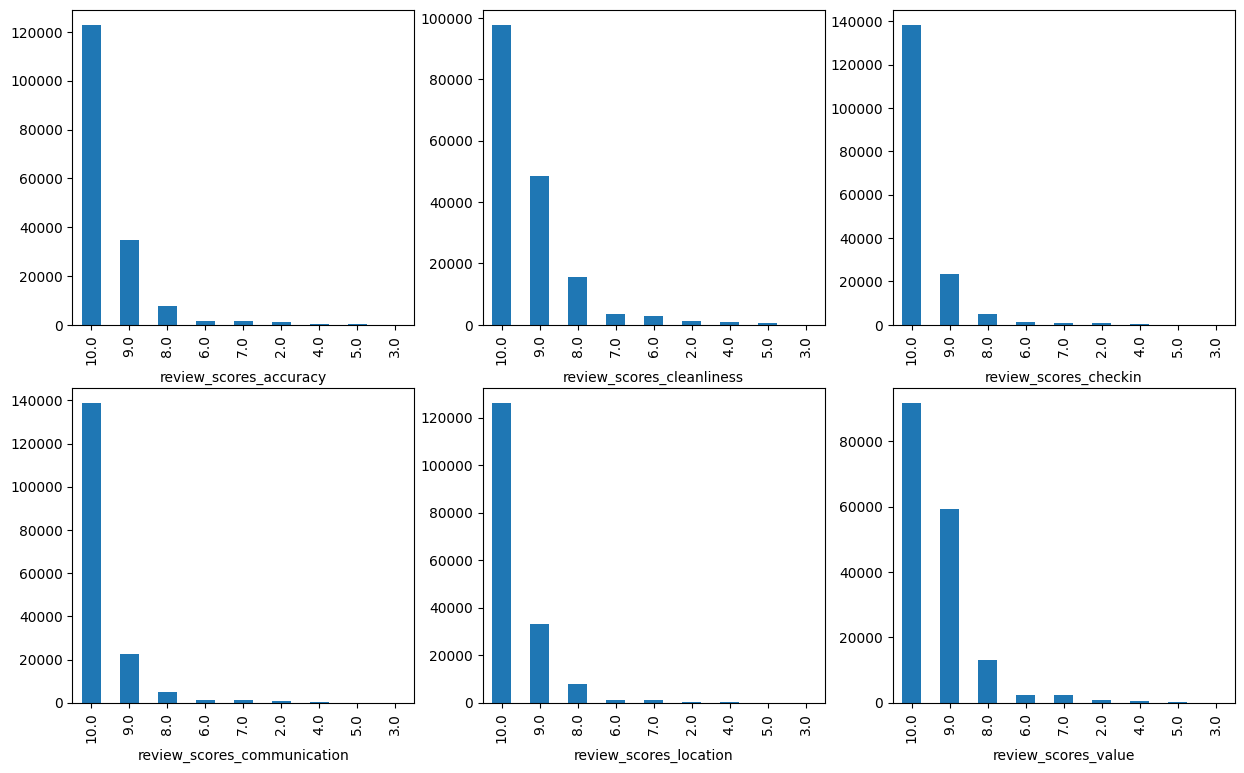

In [59]:
plt.figure(figsize=(15,9))
plt.subplot(2,3,1)
df["review_scores_accuracy"].value_counts().plot(kind="bar")
plt.subplot(2,3,2)
df["review_scores_cleanliness"].value_counts().plot(kind="bar")
plt.subplot(2,3,3)
df["review_scores_checkin"].value_counts().plot(kind="bar")
plt.subplot(2,3,4)
df["review_scores_communication"].value_counts().plot(kind="bar")
plt.subplot(2,3,5)
df["review_scores_location"].value_counts().plot(kind="bar")
plt.subplot(2,3,6)
df["review_scores_value"].value_counts().plot(kind="bar")
plt.show()

In [60]:
cols=["review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication",
      "review_scores_location","review_scores_value"]
for i in cols:
    df[i]=df[i].fillna(df[i].mode()[0])
    df[i]=df[i].astype(int)

In [61]:
# the price is given in each countrys currency. so we convert all to usd according to the value in 2025
# (paris,rome)1 euro=1.05usd, (sydney)1aud=0.64usd, (bangkok)1thai baht=0.030usd, (istambul)1 turkish lira=0.028usd
# (hk)1hkd=0.13usd, (mexicocity)1mp=0.049usd, (capetown)1south african rand=0.054usd, (rdj)1real=0.175usd

In [62]:
df['price'] = np.where(df['city'] == 'Paris',df['price'] * 1.05,df['price'])#euro
df['price'] = np.where(df['city'] == 'Rome',df['price'] * 1.05,df['price'])#euro
df['price'] = np.where(df['city'] == 'Sydney',df['price'] * 0.64,df['price'])#AUD
df['price'] = np.where(df['city'] == 'Bangkok',df['price'] * 0.030,df['price'])#thai baht
df['price'] = np.where(df['city'] == 'Istanbul',df['price'] * 0.028,df['price'])#turkish lira
df['price'] = np.where(df['city'] == 'Hong Kong',df['price'] * 0.13,df['price'])#hkd
df['price'] = np.where(df['city'] == 'Mexico City',df['price'] * 0.049,df['price'])#mexican peso
df['price'] = np.where(df['city'] == 'Cape Town',df['price'] * 0.054,df['price'])#south african rand
df['price'] = np.where(df['city'] == 'Rio de Janeiro',df['price'] * 0.175,df['price'])#brazilian real

In [63]:
df.duplicated().sum()

1584

In [64]:
df.drop_duplicates(inplace=True)

In [65]:
df.duplicated().sum()

0

In [66]:
df.isnull().sum()

host_since                     0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_total_listings_count      0
host_has_profile_pic           0
host_identity_verified         0
city                           0
property_type                  0
room_type                      0
accommodates                   0
bedrooms                       0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
dtype: int64

In [67]:
df.dtypes

host_since                     datetime64[ns]
host_response_time                     object
host_response_rate                    float64
host_acceptance_rate                  float64
host_is_superhost                      object
host_total_listings_count               int32
host_has_profile_pic                   object
host_identity_verified                 object
city                                   object
property_type                          object
room_type                              object
accommodates                            int64
bedrooms                                int32
amenities                              object
price                                 float64
minimum_nights                          int64
maximum_nights                          int64
review_scores_rating                  float64
review_scores_accuracy                  int32
review_scores_cleanliness               int32
review_scores_checkin                   int32
review_scores_communication       

In [68]:
df.shape

(244834, 25)

## 
## Exploratory Data Analysis and Insights Building

In [69]:
new_df=df[(df["price"]<1000)]

<h3 style="color:red;">Q1. what insights do you have about the impact of the 2015 regulations on AirBnB?</h3>

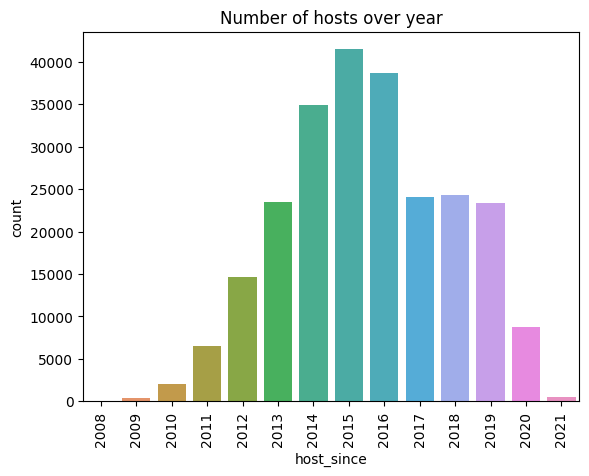

In [70]:
plt.xticks(rotation=90)
sns.countplot(x=new_df["host_since"].dt.year).set(title="Number of hosts over year")
plt.show()

* AirBnB started in the year 2008
* Highest number of hosts established in 2015 due to the new government rules and regulation oh renting and renting platforms and therby the wide publicity for AirBnB in those few years.

<h3 style="color:red;">Q2. Which attributes have the biggest influence in price?</h3>

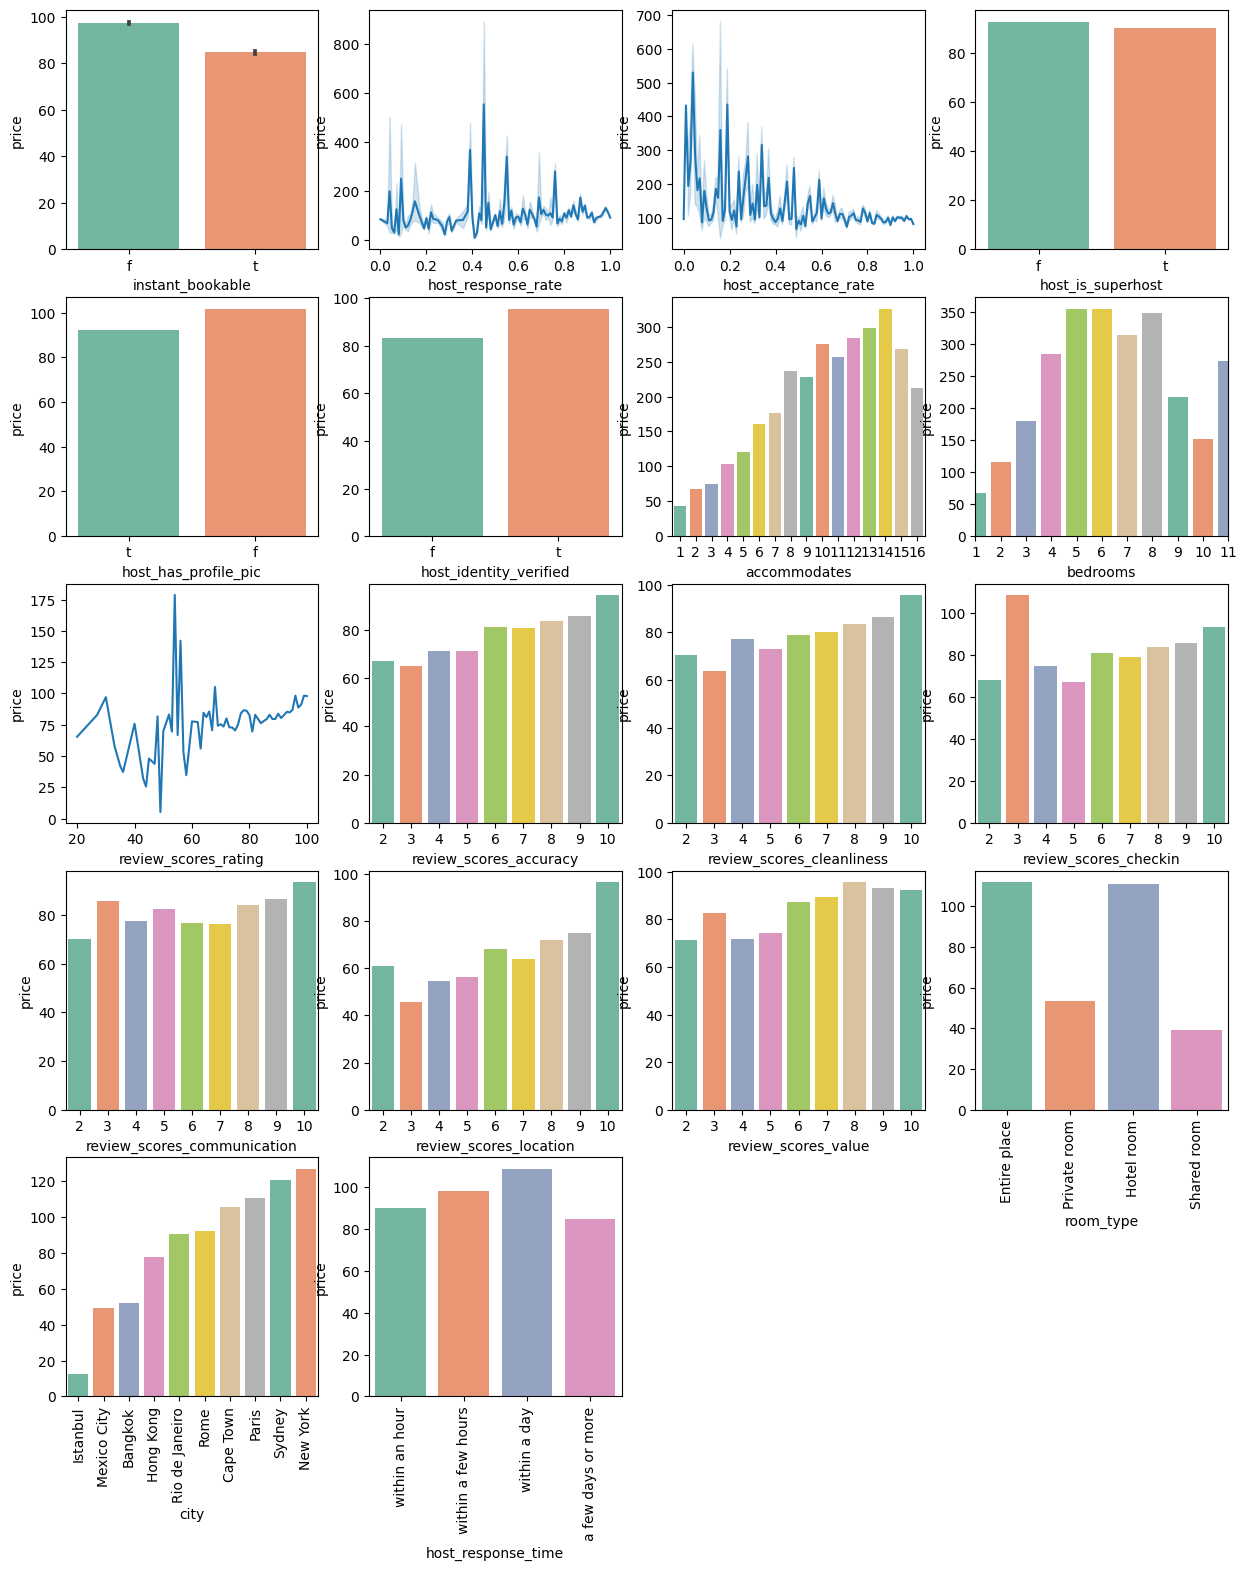

In [71]:
plt.figure(figsize=(15,18))
plt.subplot(5,4,1)
sns.barplot(x="instant_bookable",y="price",data=new_df,estimator='average',palette="Set2")
plt.subplot(5,4,2)
sns.lineplot(x="host_response_rate",y="price",data=new_df)
plt.subplot(5,4,3)
sns.lineplot(x="host_acceptance_rate",y="price",data=new_df)
plt.subplot(5,4,4)
sns.barplot(x="host_is_superhost",y="price",data=new_df,estimator='average',palette="Set2",errorbar=None)
plt.subplot(5,4,5)
sns.barplot(x="host_has_profile_pic",y="price",data=new_df,estimator='average',palette="Set2",errorbar=None)
plt.subplot(5,4,6)
sns.barplot(x="host_identity_verified",y="price",data=new_df,estimator='average',palette="Set2",errorbar=None)
plt.subplot(5,4,7)
sns.barplot(x="accommodates",y="price",data=new_df,estimator='average',palette="Set2",errorbar=None)
plt.subplot(5,4,8)
sns.barplot(x="bedrooms",y="price",data=new_df,estimator='average',errorbar=None,palette="Set2")
plt.xlim(0,10)
plt.subplot(5,4,9)
sns.lineplot(x="review_scores_rating",y="price",data=new_df,estimator='average',errorbar=None)
plt.subplot(5,4,10)
sns.barplot(x="review_scores_accuracy",y="price",data=new_df,estimator='average',errorbar=None,palette="Set2")
plt.subplot(5,4,11)
sns.barplot(x="review_scores_cleanliness",y="price",data=new_df,estimator='average',errorbar=None,palette="Set2")
plt.subplot(5,4,12)
sns.barplot(x="review_scores_checkin",y="price",data=new_df,estimator='average',errorbar=None,palette="Set2")
plt.subplot(5,4,13)
sns.barplot(x="review_scores_communication",y="price",data=new_df,estimator='average',errorbar=None,palette="Set2")
plt.subplot(5,4,14)
sns.barplot(x="review_scores_location",y="price",data=new_df,estimator='average',errorbar=None,palette="Set2")
plt.subplot(5,4,15)
sns.barplot(x="review_scores_value",y="price",data=new_df,estimator='average',errorbar=None,palette="Set2")
plt.subplot(5,4,16)
plt.xticks(rotation=90)
sns.barplot(x="room_type",y="price",data=new_df,estimator='average',errorbar=None,palette="Set2")
plt.subplot(5,4,17)
result=new_df.groupby("city")['price'].aggregate(np.mean).reset_index().sort_values("price")
plt.xticks(rotation=90)
sns.barplot(x="city",y="price",data=new_df,estimator='average',errorbar=None,order=result["city"],palette="Set2")
plt.subplot(5,4,18)
plt.xticks(rotation=90)
sns.barplot(x="host_response_time",y="price",data=new_df,estimator='average',errorbar=None,palette="Set2")
plt.show()

* The average price for hosts with verified identity is higher.
* Average price of Airbnb varies linearly with number of accomodates and bedrooms.
* There is slight increase in average price as the review scores increases.
* Average price of Entire place/Hotel room is higher than private room/Shared room.
* Highest average price in Paris, New york, sydney is high

<h3 style="color:red;">Q3. Which city generates most and the least sales in AirBnB ?</h3> 

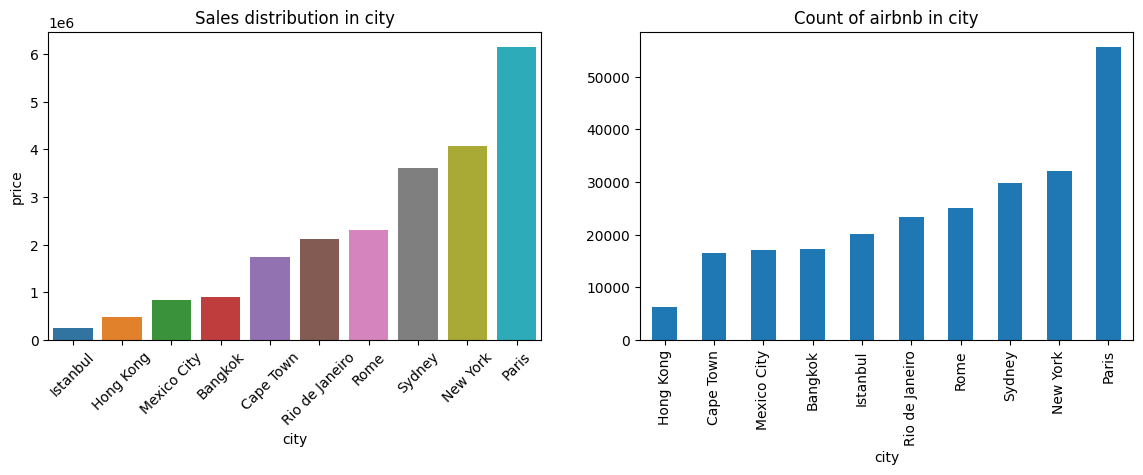

In [72]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,2)
new_df["city"].value_counts().sort_values().plot(kind="bar").set(title="Count of airbnb in city")
plt.subplot(1,2,1)
result1=new_df.groupby("city")["price"].aggregate(np.sum).reset_index().sort_values("price")
plt.xticks(rotation=45)
sns.barplot(x="city",y="price",data=new_df,estimator="sum",errorbar=None,order=result1["city"]).set(title="Sales distribution in city")
plt.show()

In [73]:
sales=new_df.groupby("city")["price"].aggregate(np.sum).reset_index().sort_values("price")
sales.reset_index(drop=True,inplace=True)
sales.T

,0,1,2,3,4,5,6,7,8,9
city,Istanbul,Hong Kong,Mexico City,Bangkok,Cape Town,Rio de Janeiro,Rome,Sydney,New York,Paris
price,254384.34,480048.53,838331.2,898705.98,1738629.468,2112044.725,2300564.7,3601762.56,4069414.0,6160798.35


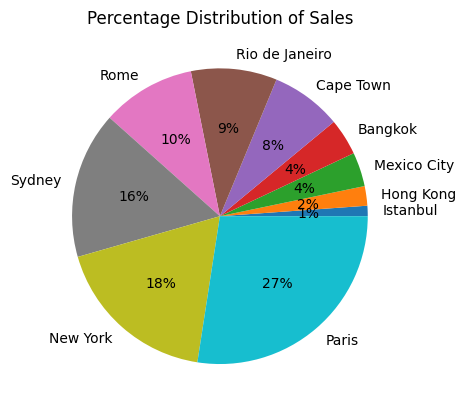

In [74]:
plt.pie(sales["price"], labels=sales["city"], autopct='%.0f%%')
plt.title('Percentage Distribution of Sales')
plt.show()

* 27% of sales is from Paris. Istanbul contributes one percentage in sales

<h3 style="color:red;"> Q4. Analyze AirBnB market in Paris</h3>

In [75]:
new_df_paris=new_df[(new_df["city"]=="Paris")]

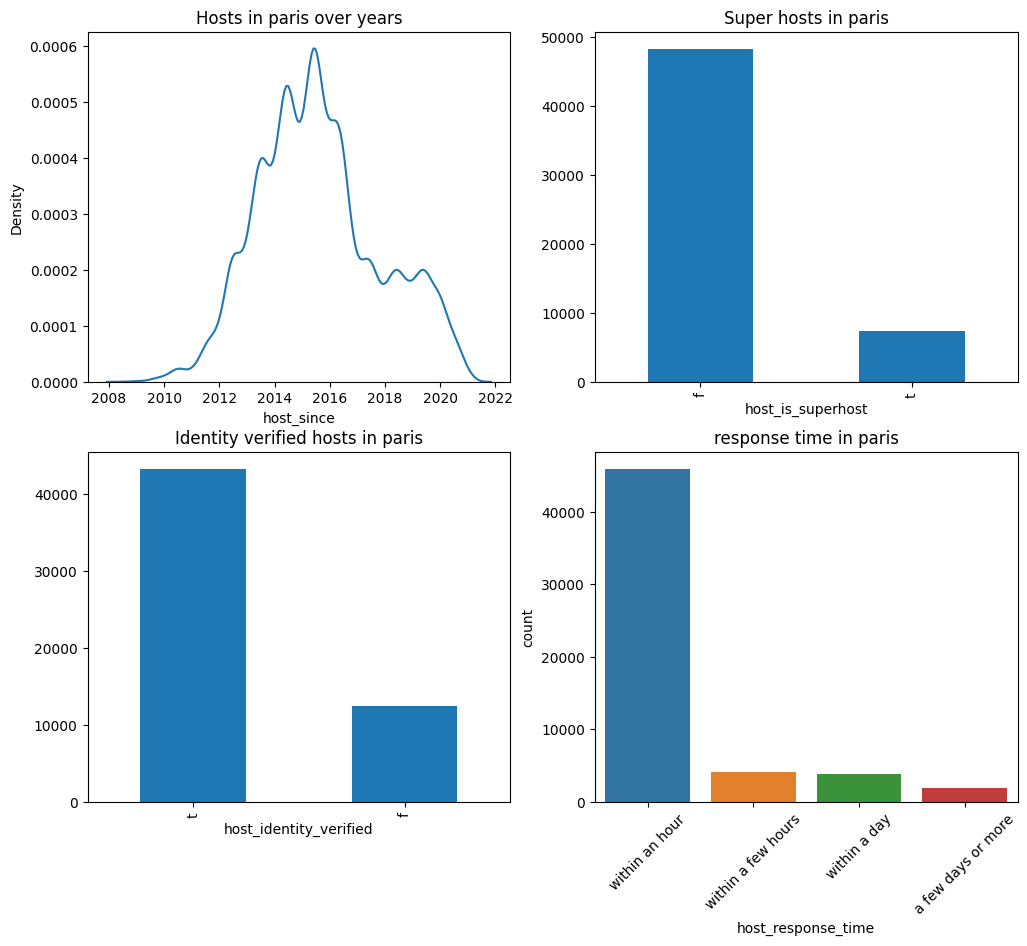

In [76]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,3)
new_df_paris["host_identity_verified"].value_counts().plot(kind="bar").set(title='Identity verified hosts in paris')
plt.subplot(2,2,2)
new_df_paris["host_is_superhost"].value_counts().plot(kind="bar").set(title='Super hosts in paris')
plt.subplot(2,2,1)
sns.kdeplot(new_df_paris["host_since"]).set(title='Hosts in paris over years')
plt.subplot(2,2,4)
plt.xticks(rotation=45)
sns.countplot(x="host_response_time",data=new_df_paris).set(title='response time in paris')
plt.show()

* Airbnb in paris started at year 2008,and the most number of hosts emerged in the year of 2016.
* Superhost is the hosts who provide excellent guest experience consistently. These type of hosts is very less in Paris.
* Majority hosts are verified by tthe government.
* Paris brings the most revenue and have the most number of AirBnBs.
* Majority of the hosts give fast response

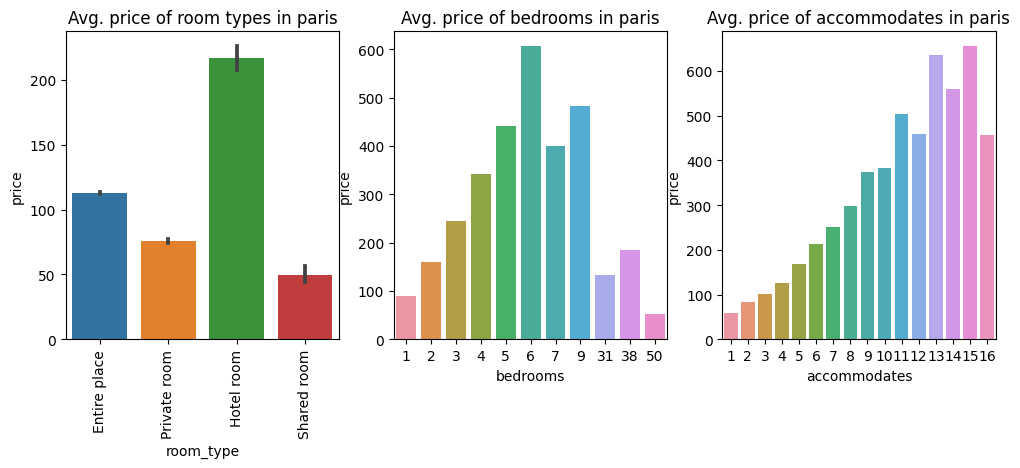

In [77]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,2)
sns.barplot(x="bedrooms",y="price",data=new_df_paris,errorbar=None).set(title='Avg. price of bedrooms in paris')
plt.subplot(1,3,1)
plt.xticks(rotation=90)
sns.barplot(x="room_type",y="price",data=new_df_paris).set(title='Avg. price of room types in paris')
plt.subplot(1,3,3)
sns.barplot(x="accommodates",y="price",data=new_df_paris,errorbar=None).set(title='Avg. price of accommodates in paris')
plt.show()

In [78]:
bed6=new_df_paris[(new_df_paris["bedrooms"]==6) | (new_df_paris["room_type"]=="Hotel room") | (new_df_paris["accommodates"]==15)]["property_type"].unique()
print(f"These are the property types with highest averge price:\n\n{bed6}")

These are the property types with highest averge price:

['Entire apartment' 'Entire condominium' 'Room in serviced apartment'
 'Entire house' 'Room in boutique hotel' 'Entire loft' 'Entire townhouse'
 'Room in hotel' 'Room in bed and breakfast' 'Room in aparthotel'
 'Room in hostel' 'Private room']
